# Sensitivity analysis

Sensitivity analysis (SA) studies the uncertainty in the output of a model. It attempts to measure this uncertainty in the output by making small (known) changes in the inputs, in the process identifying which parameter/set of parameters has the greatest influence. This increases understanding of the relationship between input and output, which in turn can help us find errors in the model. Another purpose of SA is model simplification; model inputs that have little to no effect on the output can be fixed to specific values.

In this notebook we aim to familiarise you with OFAT and Sobol SA. We will use Mesa's BatchRunner throughout the notebook and Sobol SA will be done through use of [SALib](https://github.com/SALib/SALib).

First, we install the package and test if we can import it.

Now we'll import everything required for this notebook...

In [1]:
%matplotlib inline
from IPython.display import clear_output
from SALib.sample import saltelli
from model import FIFA_Simulation
from manager import Manager
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

# The model

SA is only usefull if we can apply it to something. Instead of having you make another model, we will use a predator-prey model that you are familiar with; the "wolf-sheep predation model". Specifically, [the wolf-sheep model provided in the examples provided by Mesa](https://github.com/projectmesa/mesa/tree/master/examples/wolf_sheep). You might recognise parts of it that were used as inspiration for the first notebook.

From the description:

''A simple ecological model, consisting of three agent types: wolves, sheep, and grass. The wolves and the sheep wander around the grid at random. Wolves and sheep both expend energy moving around, and replenish it by eating. Sheep eat grass, and wolves eat sheep if they end up on the same grid cell.

If wolves and sheep have enough energy, they reproduce, creating a new wolf or sheep (in this simplified model, only one parent is needed for reproduction). The grass on each cell regrows at a constant rate. If any wolves and sheep run out of energy, they die.''

The model can be found in the folder 'wolf_sheep/'. If you are interested, you can read through the code. You can even use:

`mesa runserver`

...to view the model in action.

# OFAT SA
One Factor at A Time (OFAT or OFaaT) SA is a method of testing the output variance of inputs one at a time. 

We will show you how to change only one variable at the time and how to plot the results. The model we use has default parameters for each of the variables, which makes this fairly easy.

In [2]:
# We define our variables and bounds
problem = {
    'num_vars': 3,
    'names': ['mu', 'sigma', 'earnings_ratio'],
    'bounds': [[25000000, 50000000], [2500000, 5000000], [(1 / 20), (1 / 5)]]
}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 5
max_steps = 15
distinct_samples = 5

# Set the outputs (STILL NEED TO IMPLEMENT THIS IN ACTUAL MODEL)
model_reporters = {"Manager assets": lambda m: m.schedule.get_manager_assets(),
             "Manager reputation": lambda m: m.schedule.get_manager_reputation()}

data = {}



In [ ]:
for i, var in enumerate(problem['names']):
    # Get the bounds for this variable and get <distinct_samples> samples within this space (uniform)
    samples = np.linspace(*problem['bounds'][i], num=distinct_samples)
    
    batch = BatchRunner(FIFA_Simulation, 
                        max_steps=max_steps,
                        iterations=replicates,
                        variable_parameters={var: samples},
                        model_reporters=model_reporters,
                        display_progress=True)
    
    batch.run_all()
    
    data[var] = batch.get_model_vars_dataframe()

0it [00:00, ?it/s]

Transforming fifa data took --- 0.05702328681945801 seconds ---
Initializing agents took --- 7.8388073444366455 seconds ---
Manager 4 has 25389136.70674352 funds available to pick players
Manager 11 has 28329177.154556867 funds available to pick players
Manager 14 has 26255661.240907468 funds available to pick players
Manager 13 has 23991969.60894438 funds available to pick players
Manager 0 has 23459306.491777163 funds available to pick players
Manager 7 has 27023325.308001768 funds available to pick players
Manager 8 has 25431000.402385596 funds available to pick players
Manager 2 has 23842291.55535821 funds available to pick players
Manager 12 has 26146261.906040296 funds available to pick players
Manager 5 has 24597663.0448782 funds available to pick players
Manager 17 has 22028849.399218284 funds available to pick players
Manager 10 has 27268796.84493216 funds available to pick players
Manager 9 has 27577069.072749626 funds available to pick players
Manager 15 has 22793573.9822578

1it [00:23, 23.16s/it]

Initializing agents took --- 8.575077295303345 seconds ---
Manager 15 has 27319844.146936223 funds available to pick players
Manager 11 has 29345988.99826587 funds available to pick players
Manager 10 has 23309164.503417514 funds available to pick players
Manager 1 has 26625308.550115097 funds available to pick players
Manager 14 has 24755811.197620086 funds available to pick players
Manager 3 has 24569571.55431771 funds available to pick players
Manager 2 has 27064206.628451042 funds available to pick players
Manager 0 has 28091161.913020425 funds available to pick players
Manager 16 has 25314784.71671087 funds available to pick players
Manager 8 has 25319107.090931375 funds available to pick players
Manager 17 has 22834351.195932824 funds available to pick players
Manager 6 has 26014079.235381965 funds available to pick players
Manager 5 has 25710432.06095871 funds available to pick players
Manager 13 has 25655093.7205419 funds available to pick players
Manager 9 has 21123042.7275702

2it [00:46, 23.27s/it]

Initializing agents took --- 8.556518793106079 seconds ---
Manager 17 has 26355792.67797849 funds available to pick players
Manager 12 has 21563037.440732244 funds available to pick players
Manager 13 has 28284848.456657372 funds available to pick players
Manager 4 has 26267807.89912204 funds available to pick players
Manager 16 has 25752303.55660105 funds available to pick players
Manager 0 has 23476227.88686663 funds available to pick players
Manager 15 has 22384398.703086108 funds available to pick players
Manager 7 has 25977034.088433277 funds available to pick players
Manager 3 has 24449508.07348606 funds available to pick players
Manager 11 has 24277846.40471225 funds available to pick players
Manager 5 has 21755972.35239786 funds available to pick players
Manager 1 has 23182688.317093983 funds available to pick players
Manager 10 has 25453182.852276936 funds available to pick players
Manager 6 has 20429638.318529546 funds available to pick players
Manager 9 has 26326028.5331968 

3it [01:10, 23.33s/it]

Initializing agents took --- 8.078436374664307 seconds ---
Manager 14 has 29418400.431158166 funds available to pick players
Manager 1 has 24411482.77716268 funds available to pick players
Manager 8 has 26021630.810379565 funds available to pick players
Manager 9 has 25645577.515917227 funds available to pick players
Manager 6 has 25655240.520204227 funds available to pick players
Manager 0 has 25321814.1530714 funds available to pick players
Manager 11 has 24445417.463356163 funds available to pick players
Manager 10 has 27299959.814158328 funds available to pick players
Manager 16 has 20885464.618122786 funds available to pick players
Manager 3 has 25967898.53192037 funds available to pick players
Manager 15 has 23568383.917615987 funds available to pick players
Manager 5 has 26584080.865193173 funds available to pick players
Manager 4 has 25030131.1573228 funds available to pick players
Manager 17 has 29411256.24459957 funds available to pick players
Manager 7 has 23696376.349974982

4it [01:33, 23.23s/it]

Initializing agents took --- 7.983109951019287 seconds ---
Manager 14 has 23775736.909916393 funds available to pick players
Manager 8 has 23850198.434396166 funds available to pick players
Manager 10 has 26285464.010735884 funds available to pick players
Manager 7 has 27517179.93568231 funds available to pick players
Manager 2 has 26565287.047771093 funds available to pick players
Manager 13 has 28803789.089217484 funds available to pick players
Manager 5 has 23896764.776190624 funds available to pick players
Manager 17 has 22867635.197896104 funds available to pick players
Manager 3 has 29345025.51735351 funds available to pick players
Manager 6 has 24133646.07057519 funds available to pick players
Manager 9 has 24427292.529031202 funds available to pick players
Manager 0 has 24775731.194255833 funds available to pick players
Manager 11 has 21348274.465237293 funds available to pick players
Manager 12 has 25297590.299870405 funds available to pick players
Manager 15 has 28449408.9146

5it [01:55, 23.01s/it]

Initializing agents took --- 8.690616607666016 seconds ---
Manager 16 has 28613515.577008203 funds available to pick players
Manager 2 has 32181889.88507282 funds available to pick players
Manager 12 has 30116177.702484317 funds available to pick players
Manager 5 has 31279777.44211206 funds available to pick players
Manager 15 has 32195584.134010993 funds available to pick players
Manager 3 has 26871356.123904176 funds available to pick players
Manager 1 has 34875521.16756764 funds available to pick players
Manager 4 has 31198239.128747445 funds available to pick players
Manager 7 has 29625413.22785988 funds available to pick players
Manager 6 has 30677227.634446327 funds available to pick players
Manager 10 has 31236846.875633102 funds available to pick players
Manager 14 has 26243491.220985204 funds available to pick players
Manager 13 has 32090043.321390577 funds available to pick players
Manager 9 has 31000485.717363838 funds available to pick players
Manager 17 has 27759707.80175

6it [02:22, 24.25s/it]

Initializing agents took --- 8.211308002471924 seconds ---
Manager 12 has 32202611.80899068 funds available to pick players
Manager 1 has 32292529.102383304 funds available to pick players
Manager 5 has 30488021.38627093 funds available to pick players
Manager 10 has 33315736.312377956 funds available to pick players
Manager 11 has 32696828.530480184 funds available to pick players
Manager 14 has 33122671.310681436 funds available to pick players
Manager 16 has 28931480.506194104 funds available to pick players
Manager 8 has 34063515.65876861 funds available to pick players
Manager 17 has 31680477.157130275 funds available to pick players
Manager 3 has 29029695.559828714 funds available to pick players
Manager 9 has 30522951.043505304 funds available to pick players
Manager 15 has 31232482.85434861 funds available to pick players
Manager 0 has 33600512.39459329 funds available to pick players
Manager 6 has 28953293.71278221 funds available to pick players
Manager 2 has 31793839.3115383

7it [02:48, 24.66s/it]

Initializing agents took --- 8.517520427703857 seconds ---
Manager 16 has 32431387.489975486 funds available to pick players
Manager 0 has 34223082.875897005 funds available to pick players
Manager 11 has 30944315.421428062 funds available to pick players
Manager 2 has 30502296.08592485 funds available to pick players
Manager 15 has 31839538.81567583 funds available to pick players
Manager 8 has 33483097.10927657 funds available to pick players
Manager 3 has 30310998.55913901 funds available to pick players
Manager 14 has 33040903.170242228 funds available to pick players
Manager 12 has 29665047.08194864 funds available to pick players
Manager 5 has 32650863.674109075 funds available to pick players
Manager 4 has 31810039.425315987 funds available to pick players
Manager 1 has 34769468.845721036 funds available to pick players
Manager 10 has 37808324.49324287 funds available to pick players
Manager 17 has 27950240.727663077 funds available to pick players
Manager 13 has 29209491.739513

8it [03:12, 24.59s/it]

Initializing agents took --- 8.009918928146362 seconds ---
Manager 1 has 31794688.962582674 funds available to pick players
Manager 12 has 32425447.17480911 funds available to pick players
Manager 0 has 29222870.332794476 funds available to pick players
Manager 14 has 32079885.53584611 funds available to pick players
Manager 6 has 33050648.686552297 funds available to pick players
Manager 9 has 31307563.211956464 funds available to pick players
Manager 11 has 30638845.38810562 funds available to pick players
Manager 3 has 31878259.310847584 funds available to pick players
Manager 7 has 31970307.680958223 funds available to pick players
Manager 4 has 33215309.60898612 funds available to pick players
Manager 17 has 34379784.89146348 funds available to pick players
Manager 16 has 30797444.72943503 funds available to pick players
Manager 8 has 28645870.99321318 funds available to pick players
Manager 5 has 29141306.337870758 funds available to pick players
Manager 15 has 29130747.794989783

9it [03:37, 24.59s/it]

Initializing agents took --- 8.39732313156128 seconds ---
Manager 13 has 34269769.91342042 funds available to pick players
Manager 3 has 34149894.50381561 funds available to pick players
Manager 10 has 27149938.0540516 funds available to pick players
Manager 9 has 34496088.767973505 funds available to pick players
Manager 14 has 33290266.66132669 funds available to pick players
Manager 0 has 30739374.951405875 funds available to pick players
Manager 8 has 29362781.0651047 funds available to pick players
Manager 6 has 33711347.89982328 funds available to pick players
Manager 16 has 28210418.61858285 funds available to pick players
Manager 4 has 33367433.340885375 funds available to pick players
Manager 1 has 32845472.767993025 funds available to pick players
Manager 11 has 30326402.473824274 funds available to pick players
Manager 5 has 32074782.460211884 funds available to pick players
Manager 12 has 36213640.61367336 funds available to pick players
Manager 17 has 27377279.67018031 fun

10it [04:00, 24.19s/it]

Initializing agents took --- 9.314033269882202 seconds ---
Manager 3 has 37529851.13171919 funds available to pick players
Manager 9 has 39212960.514474355 funds available to pick players
Manager 5 has 36253272.64803178 funds available to pick players
Manager 4 has 39480624.33068116 funds available to pick players
Manager 16 has 38261681.40812464 funds available to pick players
Manager 8 has 36471958.18927442 funds available to pick players
Manager 13 has 36697798.263348594 funds available to pick players
Manager 2 has 37175973.766898915 funds available to pick players
Manager 17 has 35974406.44003358 funds available to pick players
Manager 10 has 33210703.528086677 funds available to pick players
Manager 1 has 33323830.056573886 funds available to pick players
Manager 12 has 37434808.31766402 funds available to pick players
Manager 15 has 33059131.771235928 funds available to pick players
Manager 6 has 35475258.699919604 funds available to pick players
Manager 14 has 41480262.86293402

11it [04:27, 25.09s/it]

Initializing agents took --- 8.395780324935913 seconds ---
Manager 6 has 37032017.710425854 funds available to pick players
Manager 12 has 34954411.68837764 funds available to pick players
Manager 8 has 35553710.48428861 funds available to pick players
Manager 15 has 39197513.78142274 funds available to pick players
Manager 0 has 40996698.71652687 funds available to pick players
Manager 9 has 36152821.439785846 funds available to pick players
Manager 11 has 33520424.664310437 funds available to pick players
Manager 3 has 36260913.26501 funds available to pick players
Manager 10 has 34625431.21002947 funds available to pick players
Manager 17 has 34088817.597383395 funds available to pick players
Manager 16 has 37140200.96661716 funds available to pick players
Manager 2 has 42560640.269726545 funds available to pick players
Manager 1 has 37163635.622338004 funds available to pick players
Manager 4 has 36946498.04287774 funds available to pick players
Manager 13 has 37240196.939102806 fu

12it [04:52, 25.06s/it]

Initializing agents took --- 8.323533058166504 seconds ---
Manager 16 has 37426018.91359573 funds available to pick players
Manager 13 has 36414282.339508906 funds available to pick players
Manager 4 has 34039868.259027615 funds available to pick players
Manager 12 has 35954817.539221145 funds available to pick players
Manager 8 has 38266112.38621344 funds available to pick players
Manager 11 has 34431054.31542216 funds available to pick players
Manager 10 has 37960754.09890558 funds available to pick players
Manager 3 has 32509564.919568148 funds available to pick players
Manager 17 has 38602335.19058773 funds available to pick players
Manager 1 has 38490673.22730696 funds available to pick players
Manager 7 has 42535194.135579206 funds available to pick players
Manager 5 has 36964836.3420608 funds available to pick players
Manager 2 has 37362676.362760834 funds available to pick players
Manager 0 has 35618864.573999375 funds available to pick players
Manager 6 has 37174761.16858019 f

13it [05:17, 24.85s/it]

Initializing agents took --- 8.338839530944824 seconds ---
Manager 13 has 40210387.01476866 funds available to pick players
Manager 10 has 42661133.909813486 funds available to pick players
Manager 11 has 37801270.6851941 funds available to pick players
Manager 3 has 39760199.36575966 funds available to pick players
Manager 17 has 38195547.54770118 funds available to pick players
Manager 5 has 35722002.49920165 funds available to pick players
Manager 8 has 36933010.147791825 funds available to pick players
Manager 7 has 36593860.48333153 funds available to pick players
Manager 0 has 33978210.68252093 funds available to pick players
Manager 12 has 37768463.56163224 funds available to pick players
Manager 15 has 40037903.8331778 funds available to pick players
Manager 14 has 33487546.60677348 funds available to pick players
Manager 6 has 40439924.407374404 funds available to pick players
Manager 9 has 38526590.300461605 funds available to pick players
Manager 4 has 39184437.36323453 fund

14it [05:42, 24.87s/it]

Initializing agents took --- 8.23755669593811 seconds ---
Manager 15 has 34445368.80388094 funds available to pick players
Manager 6 has 36236994.21185628 funds available to pick players
Manager 1 has 33569392.56162792 funds available to pick players
Manager 10 has 34426435.82254412 funds available to pick players
Manager 2 has 36625474.880224355 funds available to pick players
Manager 14 has 37283901.847150564 funds available to pick players
Manager 16 has 37937552.923361555 funds available to pick players
Manager 17 has 36301747.11416541 funds available to pick players
Manager 13 has 36253787.17963063 funds available to pick players
Manager 8 has 32457770.041640595 funds available to pick players
Manager 0 has 35629345.76010444 funds available to pick players
Manager 12 has 39364190.47431716 funds available to pick players
Manager 7 has 37653122.80753265 funds available to pick players
Manager 5 has 36612553.031073935 funds available to pick players
Manager 9 has 41801164.912173614 f

15it [06:06, 24.81s/it]

Initializing agents took --- 8.712342739105225 seconds ---
Manager 11 has 43468523.041568846 funds available to pick players
Manager 17 has 46803912.1923428 funds available to pick players
Manager 0 has 41635849.6660105 funds available to pick players
Manager 13 has 39902531.44721448 funds available to pick players
Manager 1 has 41567569.28200199 funds available to pick players
Manager 3 has 39377311.744387224 funds available to pick players
Manager 12 has 41024089.60699336 funds available to pick players
Manager 14 has 40595630.253334254 funds available to pick players
Manager 5 has 47272971.73043355 funds available to pick players
Manager 9 has 45481727.10035814 funds available to pick players
Manager 4 has 42055255.797976874 funds available to pick players
Manager 16 has 45082872.16872185 funds available to pick players
Manager 6 has 41275116.64881041 funds available to pick players
Manager 2 has 42352706.383205496 funds available to pick players
Manager 15 has 46470591.49399727 fun

16it [06:32, 25.07s/it]

Initializing agents took --- 8.376852035522461 seconds ---
Manager 17 has 48759608.50872536 funds available to pick players
Manager 4 has 41848985.91413342 funds available to pick players
Manager 1 has 47957465.04820971 funds available to pick players
Manager 15 has 44581335.377041556 funds available to pick players
Manager 10 has 41230662.28449973 funds available to pick players
Manager 3 has 45828582.58587191 funds available to pick players
Manager 6 has 41033664.60712138 funds available to pick players
Manager 14 has 43488927.83306893 funds available to pick players
Manager 16 has 44158454.79981956 funds available to pick players
Manager 2 has 45716758.23317833 funds available to pick players
Manager 13 has 42949483.526765004 funds available to pick players
Manager 0 has 43358037.181172445 funds available to pick players
Manager 5 has 43866297.9716828 funds available to pick players
Manager 11 has 43614420.89128151 funds available to pick players
Manager 7 has 44225106.06851846 fund

17it [06:57, 25.05s/it]

Initializing agents took --- 8.604814529418945 seconds ---
Manager 0 has 45296044.80185575 funds available to pick players
Manager 3 has 43478615.56074961 funds available to pick players
Manager 15 has 45195267.11703834 funds available to pick players
Manager 11 has 46092172.85798228 funds available to pick players
Manager 5 has 40686509.009017155 funds available to pick players
Manager 1 has 47988059.98351181 funds available to pick players
Manager 6 has 43097433.145403765 funds available to pick players
Manager 16 has 45673272.59231886 funds available to pick players
Manager 7 has 46983727.12640851 funds available to pick players
Manager 17 has 43739163.66977893 funds available to pick players
Manager 4 has 41657945.96136482 funds available to pick players
Manager 13 has 42154841.53847116 funds available to pick players
Manager 2 has 42901947.514835946 funds available to pick players
Manager 9 has 43299123.51419226 funds available to pick players
Manager 10 has 45160609.35030644 fund

18it [07:22, 25.10s/it]

Initializing agents took --- 8.319893598556519 seconds ---
Manager 15 has 45268491.04389924 funds available to pick players
Manager 0 has 40486362.61389581 funds available to pick players
Manager 1 has 46228602.393472865 funds available to pick players
Manager 2 has 40794259.94218693 funds available to pick players
Manager 9 has 46628369.80561025 funds available to pick players
Manager 12 has 44766317.167278446 funds available to pick players
Manager 7 has 40188289.106668584 funds available to pick players
Manager 3 has 43959859.01240544 funds available to pick players
Manager 8 has 45676198.30460993 funds available to pick players
Manager 5 has 42587671.31682642 funds available to pick players
Manager 11 has 45850452.30273792 funds available to pick players
Manager 10 has 44871677.23824201 funds available to pick players
Manager 4 has 44423449.6534668 funds available to pick players
Manager 14 has 44157997.24855901 funds available to pick players
Manager 6 has 44714778.70518857 funds 

19it [07:48, 25.34s/it]

Initializing agents took --- 8.32000207901001 seconds ---
Manager 12 has 44136785.86578033 funds available to pick players
Manager 14 has 43776800.11660925 funds available to pick players
Manager 11 has 41618725.43518422 funds available to pick players
Manager 7 has 39804474.16360482 funds available to pick players
Manager 16 has 44142899.768299274 funds available to pick players
Manager 2 has 43850360.19465888 funds available to pick players
Manager 4 has 46780362.639076635 funds available to pick players
Manager 5 has 42143807.59007467 funds available to pick players
Manager 15 has 45168130.88017428 funds available to pick players
Manager 0 has 39036668.983389065 funds available to pick players
Manager 1 has 40255907.51029161 funds available to pick players
Manager 6 has 44017830.83508034 funds available to pick players
Manager 17 has 45130489.60769466 funds available to pick players
Manager 10 has 43065285.73049882 funds available to pick players
Manager 3 has 45440983.492374204 fun

20it [08:13, 25.21s/it]

In [39]:
import pickle
# if you don't want to run experiment, just have data
data = None
with open('data1.pickle', 'rb') as handle:
    data= pickle.load(handle)

data['mu'].iloc[10]['Manager reputation']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0}

Now that we have the data, we can plot it! First show the influence of the variable on sheep, then on wolves.

####################################
Plotting param: Manager assets, averages for 5 runs


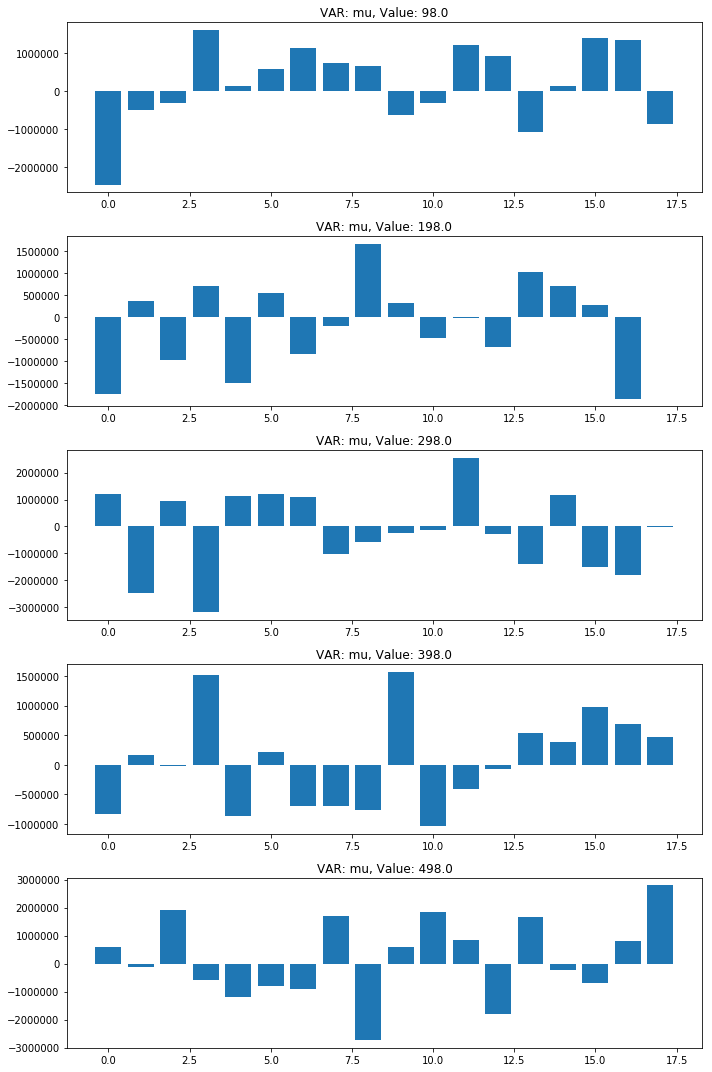

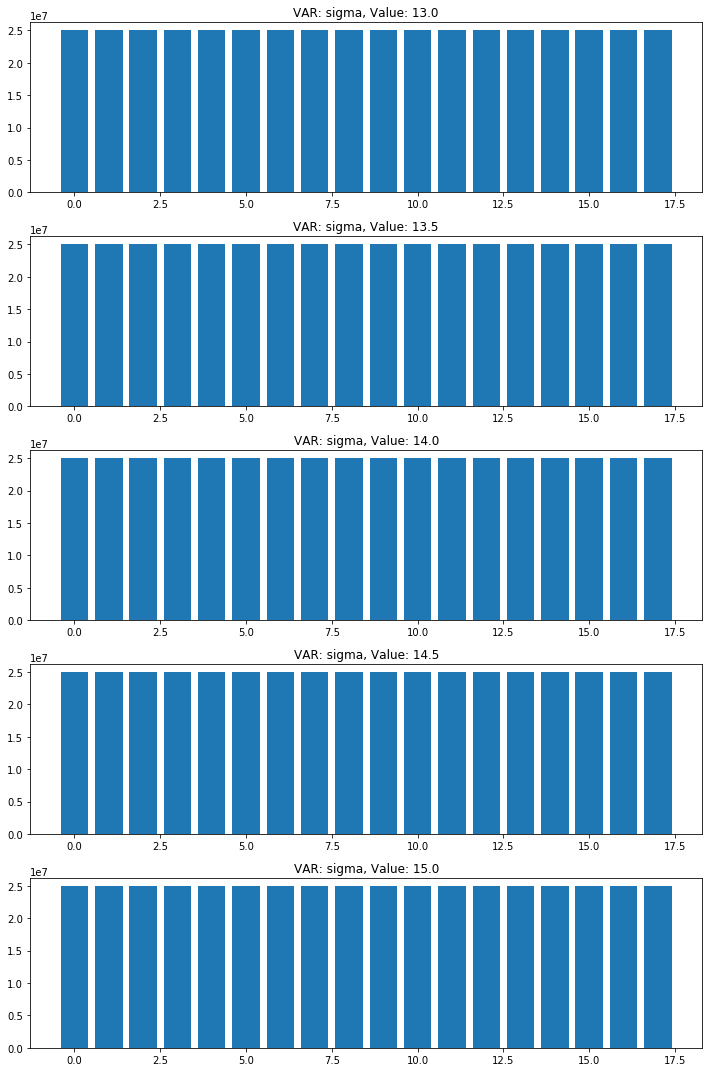

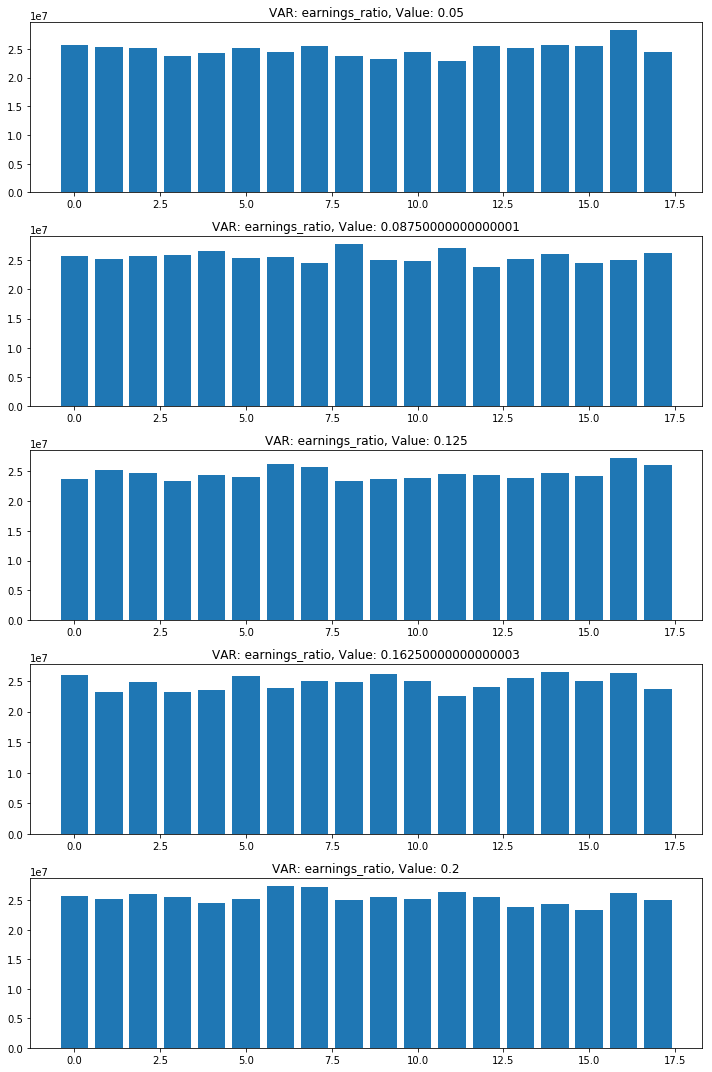

####################################
Plotting param: Manager reputation, averages for 5 runs


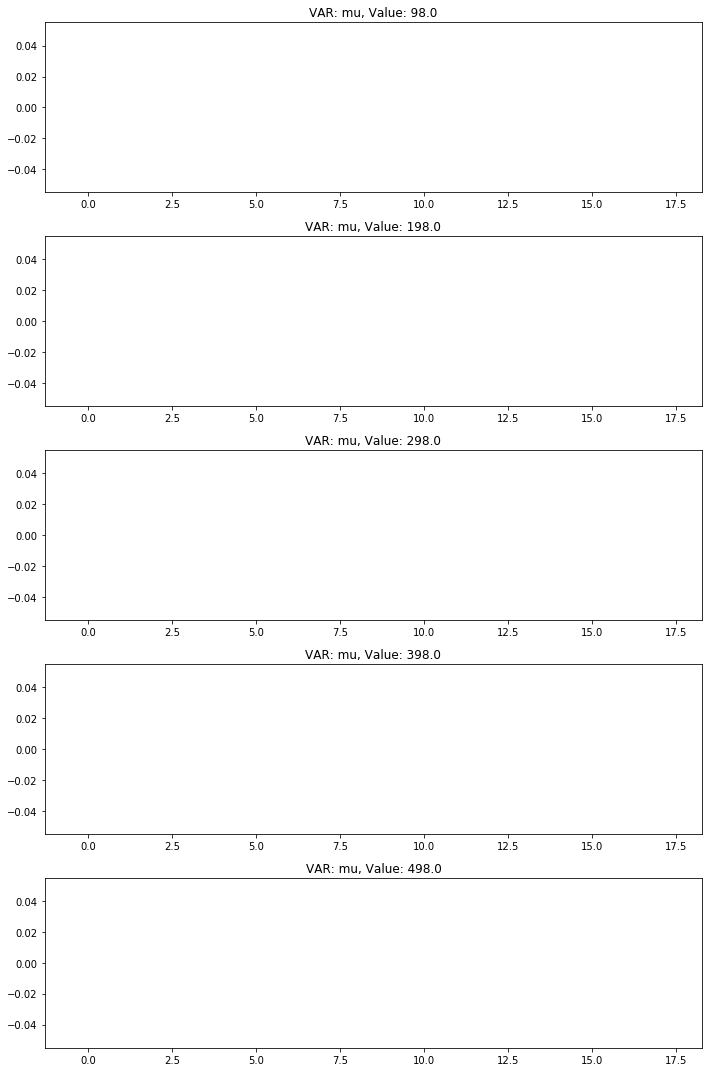

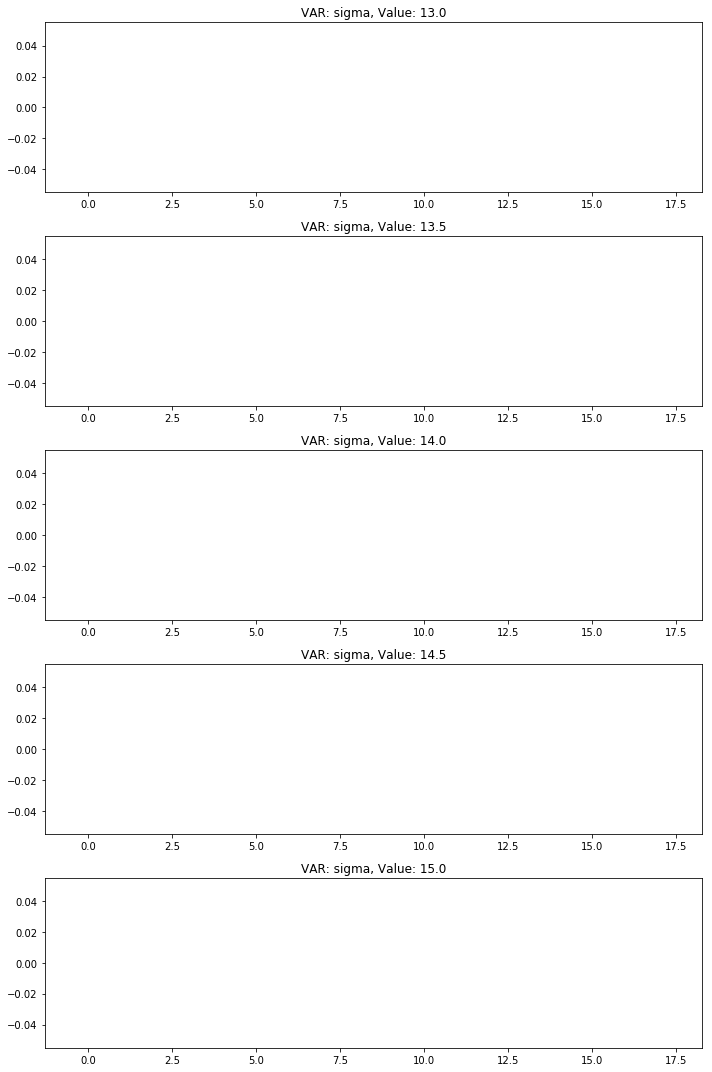

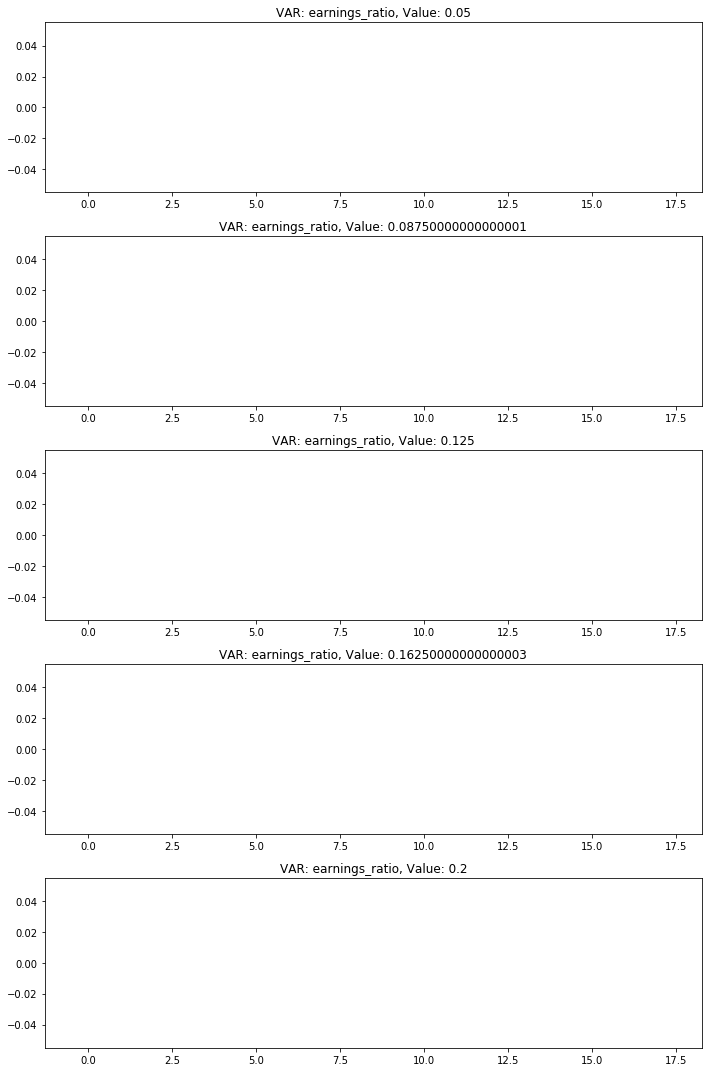

In [210]:
#Not finished, the code has to be modified to work properly
def mean_managers(data):
    
    count = 0
    out = None
    out2 = None
    for index, row in data.iterrows():
        count+=1
        if out is None:
            out = pd.DataFrame(list(row['Manager assets'].values()))
            out2 = pd.DataFrame(list(row['Manager reputation'].values()))
            
        else:
            out = out.add(pd.DataFrame(list(row['Manager assets'].values())))
            out2 = out2.add(pd.DataFrame(list(row['Manager reputation'].values())))
    out = out/count
    out2 = out2/count
    var = data.columns[0]
    
    #print(out[0].tolist())
    #print("##########")
    out =  pd.Series({var: data.iloc[0][var],'Manager assets':out[0].tolist(), 
                      'Manager reputation' :out2[0].tolist()})
    #print(out)
    return out


def plot_param_var_conf(df, var, param, i):
    """
    Helper function for plot_all_vars. Plots the individual parameter vs
    variables passed.

    Args:
        ax: the axis to plot to
        df: dataframe that holds the data to be plotted
        var: variables to be taken from the dataframe
        param: which output variable to plot
    """
    #print(var)
    #print(df)
    #print(df.iloc[0]['Manager assets'])
    mean = df.groupby(var, as_index=False).apply(mean_managers)
    #print(mean)
    
    
    f, axs = plt.subplots(mean.shape[0], figsize=(10, 15))
    
    for index, row in mean.iterrows():
        axs[index].bar(list(range(len(row[param]))),row[param])
        axs[index].set_title("VAR: " + str(var) + ", Value: " + str(row[var]))
    f.tight_layout()
    
def plot_all_vars(df, param):
    """
    Plots the parameters passed vs each of the output variables.

    Args:
        df: dataframe that holds all data
        param: the parameter to be plotted
    """

    
    print("####################################")
    print("Plotting param: {}, averages for 5 runs".format(param))
    for i, var in enumerate(problem['names']):
        plot_param_var_conf(data[var], var, param, i)

for param in ('Manager assets', 'Manager reputation'):
    plot_all_vars(data, param)
    plt.show()

# Sobol SA

Sobol Sensitivity Analysis ([Sobol 2001](http://www.sciencedirect.com/science/article/pii/S0378475400002706), [Saltelli 2002](http://www.sciencedirect.com/science/article/pii/S0010465502002801), [Saltelli et al. 2010](http://www.sciencedirect.com/science/article/pii/S0010465509003087)) is a global SA method that determines the contribution of each input parameter or a combination of parameters and their interaction to the overall output variance. OFAT, while it is easier to implement (and certainly is less thought-intensive), has a couple of downsides.

1. OFAT requires a large amount of runs to get accurate results
2. OFAT cannot estimate interactions of combinations of inputs
3. OFAT can miss optimal settings of factors

Sobol can find higher order interactions, but still requires a large amount of runs.

### Getting the data

Before we can start analysing the model, we will have to sample our data. There are multiple methods for sampling included in SALib, but since we're using Sobol, we will use Saltelli sampling for this. 

The following code shows how you could collect data for the "wolf-sheep" model.

In [7]:
# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 10
max_steps = 100
distinct_samples = 10

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples)

# READ NOTE BELOW CODE
batch = BatchRunner(WolfSheep, 
                    max_steps=max_steps,
                    variable_parameters={name:[] for name in problem['names']},
                    model_reporters=model_reporters)

count = 0
for i in range(replicates):
    for vals in param_values: 
        # Change parameters that should be integers
        vals = list(vals)
        vals[2] = int(vals[2])

        # Transform to dict with parameter names and their values
        variable_parameters = {}
        for name, val in zip(problem['names'], vals):
            variable_parameters[name] = val

        batch.run_iteration(variable_parameters, tuple(vals), count)
        count += 1

        clear_output()
        print(f'{count / (len(param_values) * (replicates)) * 100:.2f}% done')
    
data = batch.get_model_vars_dataframe()

100.00% done


Note that even though we use the BatchRunner provided by Mesa, we do not use its full capabilities. Normally, you would set all parameters properly (at line 25) and then run the batchrunner with `batch.run_all()`. However, the batchrunner will then proceed to run every possible combination of the variables you have passed it. We already have the combinations (samples) we need, because we got those from SALib.

Preferably, you would want to save the results as a csv so you can load them more easily when analysing your results. 

Printing the data shows (a part of) our results:

In [5]:
print(data)

     sheep_reproduce  wolf_reproduce  wolf_gain_from_food  Run  Sheep  Wolves
0           0.029775        0.018701                   23    0      0      12
1           0.070908        0.018701                   23    1      0      38
2           0.029775        0.035225                   23    2      0       1
3           0.029775        0.018701                   36    3      0      37
4           0.029775        0.035225                   36    4      0      11
5           0.070908        0.018701                   36    5      0      86
6           0.070908        0.035225                   23    6      0      22
7           0.070908        0.035225                   36    7      0      60
8           0.074775        0.063701                    5    8      0      29
9           0.025908        0.063701                    5    9    508       0
10          0.074775        0.080225                    5   10     68       7
11          0.074775        0.063701                   19   11  

As you can see we have 800 distinct results. One sample from saltelli-sampling results in $2^3=8$ different combinations. (We have 3 variables, and we take 2 distinct values per sample per variable. For more details, take a look at [Saltelli et al. 2010](http://www.sciencedirect.com/science/article/pii/S0010465509003087)). Since we take 10 samples, we get 80 combinations. We repeat each of these combinations 10 times, resulting in 800 results.

We only consider 2 outputs in this example; the amount of sheep and wolves at the end of the simulation. Can you think of more outputs?

### Analyzing

Now we can use the `analyze()` method provided by SALib that performs Sobol analysis. 

In [13]:
Si_sheep = sobol.analyze(problem, data['Sheep'].as_matrix(), print_to_console=True)
Si_wolves = sobol.analyze(problem, data['Wolves'].as_matrix(), print_to_console=True)

C:\Users\Vrielink\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Parameter S1 S1_conf ST ST_conf
sheep_reproduce 0.029563 0.104333 1.056517 1.369620
wolf_reproduce 0.035780 0.155213 1.775138 5.395860
wolf_gain_from_food 0.086821 0.179068 1.131345 0.617471

Parameter_1 Parameter_2 S2 S2_conf
sheep_reproduce wolf_reproduce -0.060924 0.390463
sheep_reproduce wolf_gain_from_food -0.015635 0.287321
wolf_reproduce wolf_gain_from_food -0.021814 0.214623


C:\Users\Vrielink\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Parameter S1 S1_conf ST ST_conf
sheep_reproduce 0.163361 0.078110 0.799324 0.250444
wolf_reproduce 0.198567 0.122677 0.636087 0.340575
wolf_gain_from_food 0.065698 0.085221 0.756050 0.234685

Parameter_1 Parameter_2 S2 S2_conf
sheep_reproduce wolf_reproduce -0.239985 0.104070
sheep_reproduce wolf_gain_from_food 0.068566 0.234115
wolf_reproduce wolf_gain_from_food -0.003952 0.106818


This is not very insightfull. Let's make a function that can plot this.

In [14]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

We'll first plot 1st, 2nd, and total-order sensitivity for the output variable 'Sheep', then for 'Wolves'. 

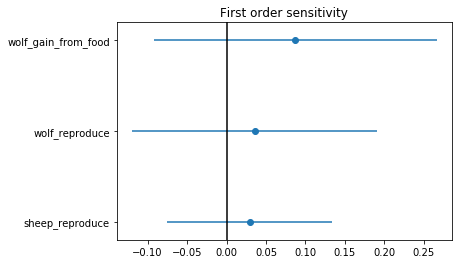

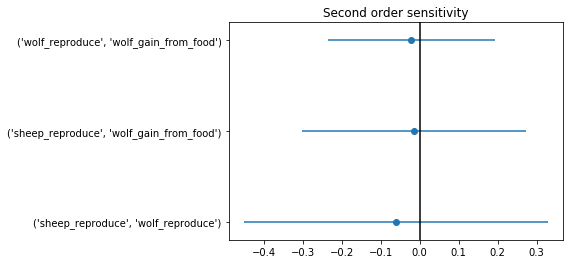

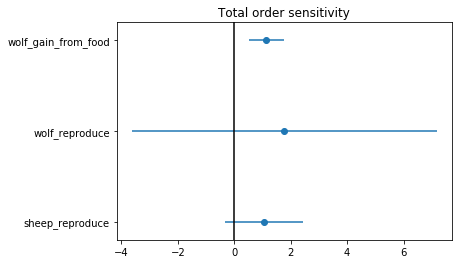

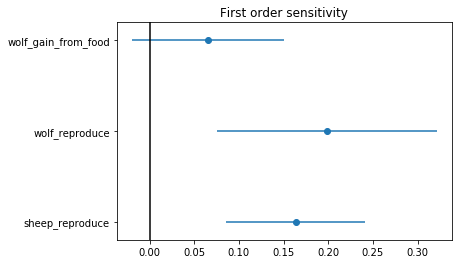

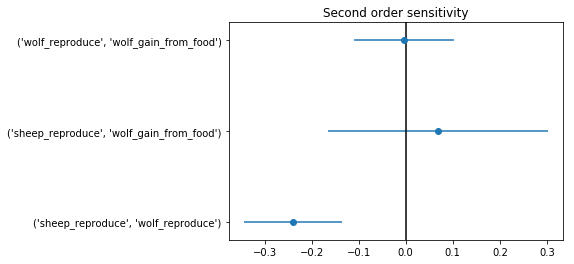

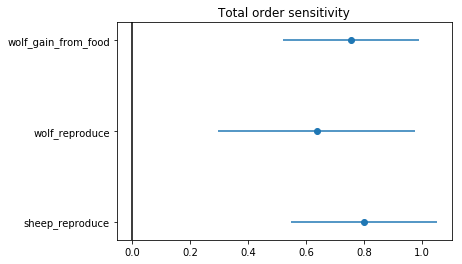

In [17]:
for Si in (Si_sheep, Si_wolves):
    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.show()

    # Second order
    plot_index(Si, problem['names'], '2', 'Second order sensitivity')
    plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    plt.show()